In [1]:
import json
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import os, pandas, numpy

In [2]:
file_root = '/mnt/d/Github/mmdetection2/project/LogMiniDet/data'

In [77]:
def data_analyse(annos, type='COCO'):
    # only support COCO annotations
    if type == 'COCO':
        with open(annos, 'r', encoding='utf-8') as f:
            data = json.load(f)
        info = data['info']
        license = data['license']
        images = data['images']
        annotations = data['annotations']
        categories = data['categories']
        print('info:{}\nlicense:{}'.format(info, license))
        print('The datasets have {} images, {} annotations'.format(len(images), len(annotations)))
        image_list = pandas.DataFrame(images)
        annotations_list = pandas.DataFrame(annotations)
        result = pandas.DataFrame.merge(annotations_list, image_list, how='inner', right_on='id', left_on='image_id')
        result.drop(['id_x', 'id_y', 'iscrowd'], axis=1, inplace= True)
        return result, pandas.DataFrame(categories)
    else:
        print('The annotation style of {} has not supported right now.'.format(type))

In [78]:
anno_files = os.path.join(file_root, 'train/annotations/instances_train2017.json')
with open(anno_files, 'r') as f:
    data = json.load(f)
print(data.keys())

dict_keys(['info', 'license', 'images', 'annotations', 'categories'])


In [79]:
datas, categories = data_analyse(anno_files, 'COCO')

print('The datasets has {} classes:\n{}'.format(len(categories), categories))
datas.head()

info:spytensor created
license:['license']
The datasets have 2476 images, 5161 annotations
The datasets has 50 classes:
    id                name
0    1                 冰墩墩
1    2            Sanyo/三洋
2    3          Eifini/伊芙丽
3    4          PSALTER/诗篇
4    5             Beaster
5    6               ON/昂跑
6    7          BYREDO/柏芮朵
7    8               Ubras
8    9           Eternelle
9   10  PERFECT DIARY/完美日记
10  11                 花西子
11  12         Clarins/娇韵诗
12  13      L'occitane/欧舒丹
13  14         Versace/范思哲
14  15          Mizuno/美津浓
15  16           Lining/李宁
16  17      DOUBLE STAR/双星
17  18          YONEX/尤尼克斯
18  19     Tory Burch/汤丽柏琦
19  20            Gucci/古驰
20  21  Louis Vuitton/路易威登
21  22       CARTELO/卡帝乐鳄鱼
22  23              JORDAN
23  24               KENZO
24  25          UNDEFEATED
25  26          BOY LONDON
26  27            TREYO/雀友
27  28            carhartt
28  29                  洁柔
29  30        Blancpain/宝珀
30  31                 GXG
31  32          

,image_id,category_id,segmentation,bbox,area,height,width,file_name
0,0,18,"[[340, 235, 340, 260.5, 340, 286, 476.0, 286, ...","[340, 235, 272, 51]",14196,650,650,0218a27cab43f45df80e26195da5599b.jpg
1,0,18,"[[198, 232, 198, 257.5, 198, 283, 242.5, 283, ...","[198, 232, 89, 51]",4680,650,650,0218a27cab43f45df80e26195da5599b.jpg
2,0,18,"[[17, 14, 17, 29.5, 17, 45, 90.5, 45, 164, 45,...","[17, 14, 147, 31]",4736,650,650,0218a27cab43f45df80e26195da5599b.jpg
3,0,18,"[[541, 204, 541, 208.5, 541, 213, 548.5, 213, ...","[541, 204, 15, 9]",160,650,650,0218a27cab43f45df80e26195da5599b.jpg
4,1,18,"[[680, 381, 680, 393.0, 680, 405, 710.5, 405, ...","[680, 381, 61, 24]",1550,600,800,9a9c0764073f88202565197f37a51084.jpg


In [6]:
datas

,image_id,category_id,segmentation,bbox,area,height,width,file_name
0,0,18,"[[340, 235, 340, 260.5, 340, 286, 476.0, 286, ...","[340, 235, 272, 51]",14196,650,650,0218a27cab43f45df80e26195da5599b.jpg
1,0,18,"[[198, 232, 198, 257.5, 198, 283, 242.5, 283, ...","[198, 232, 89, 51]",4680,650,650,0218a27cab43f45df80e26195da5599b.jpg
2,0,18,"[[17, 14, 17, 29.5, 17, 45, 90.5, 45, 164, 45,...","[17, 14, 147, 31]",4736,650,650,0218a27cab43f45df80e26195da5599b.jpg
3,0,18,"[[541, 204, 541, 208.5, 541, 213, 548.5, 213, ...","[541, 204, 15, 9]",160,650,650,0218a27cab43f45df80e26195da5599b.jpg
4,1,18,"[[680, 381, 680, 393.0, 680, 405, 710.5, 405, ...","[680, 381, 61, 24]",1550,600,800,9a9c0764073f88202565197f37a51084.jpg
...,...,...,...,...,...,...,...,...
5156,2473,1,"[[29, 50, 29, 140.0, 29, 230, 124.5, 230, 220,...","[29, 50, 191, 180]",34752,240,240,49d4c382f9d59b56b592a52ac7ff5b6d.jpg
5157,2474,1,"[[46, 328, 46, 575.5, 46, 823, 349.0, 823, 652...","[46, 328, 606, 495]",301072,1024,683,8c3bdd38b52baff08455c66ac0fe9223.jpg
5158,2474,1,"[[46, 328, 46, 575.5, 46, 823, 349.0, 823, 652...","[46, 328, 606, 495]",301072,1024,683,8c3bdd38b52baff08455c66ac0fe9223.jpg
5159,2475,1,"[[326, 502, 326, 576.0, 326, 650, 400.5, 650, ...","[326, 502, 149, 148]",22350,925,600,f084445944f726dd9965908209179e16.jpg


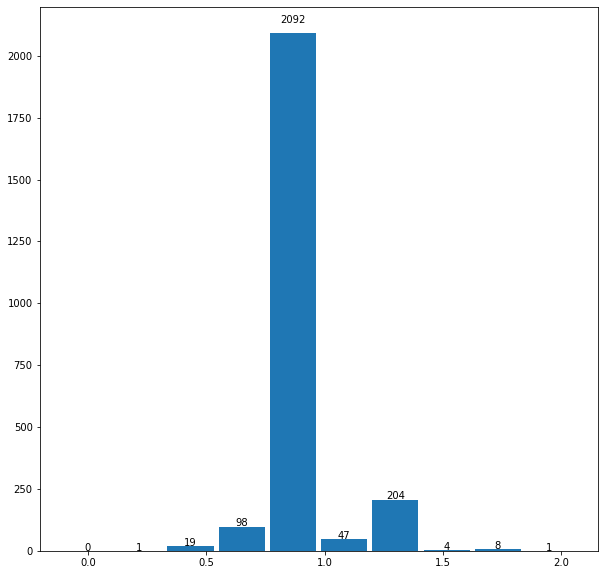

In [7]:
# image的高宽比
image_h_w = (datas.drop_duplicates('image_id')['height'] / datas.drop_duplicates('image_id')['width']).to_list()
plt.figure(figsize=(10,10))
image_h_w.sort()
n, bins, _ = plt.hist(image_h_w, range=(0, image_h_w[int(len(image_h_w)*0.999)]), align='left', rwidth=0.9, bins=10)
for i in range(len(n)):
    plt.text(bins[i]*1, n[i]*1.02, int(n[i]), horizontalalignment="center")


In [8]:
temp = datas.drop_duplicates(['image_id', 'category_id'])
for image in temp.duplicated('image_id'):
    if image == True:
        print(image)

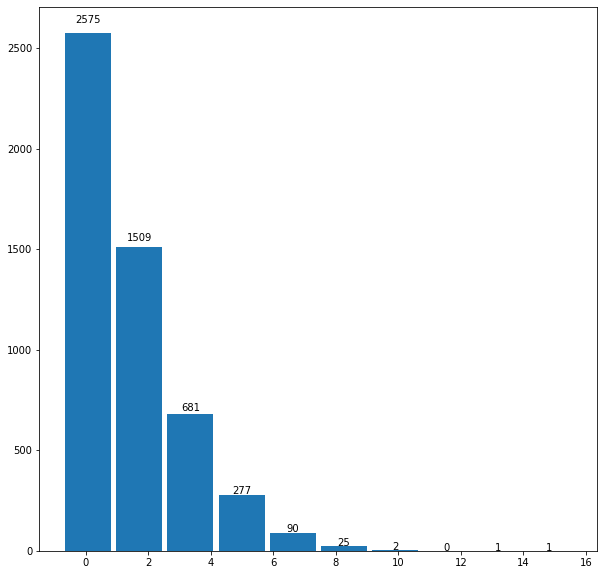

In [9]:
# bbox的高宽比
bbox = numpy.array(datas['bbox'].to_list())
bbox_h_w = bbox[:, 2] / bbox[:, 3]

plt.figure(figsize=(10,10))

n, bins, _ = plt.hist(bbox_h_w, align='left', rwidth=0.9, bins=10)
for i in range(len(n)):
    plt.text(bins[i]*1, n[i]*1.02, int(n[i]), horizontalalignment="center")

[      0.  271374.  542748.  814122. 1085496. 1356870. 1628244. 1899618.
 2170992. 2442366. 2713740.]


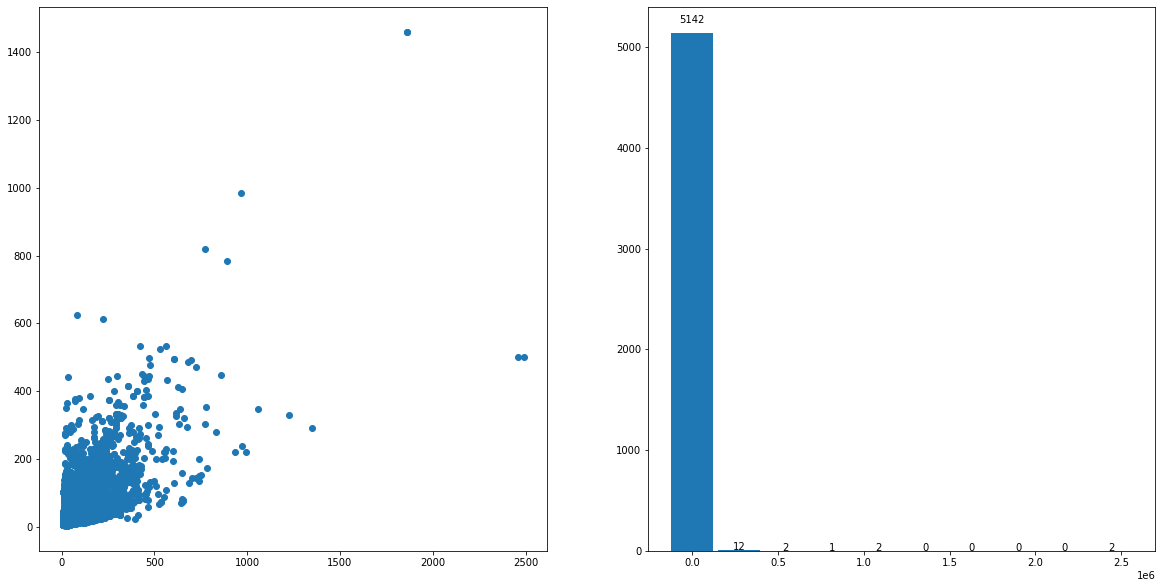

In [10]:
# bbox 面积分布
area = bbox[:, 2] * bbox[:, 3]
area.sort()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(bbox[:, 2], bbox[:, 3])
plt.subplot(1,2,2)
n, bins, _ = plt.hist(area, range=(0, area[int(len(area)*0.9999)]), align='left', rwidth=0.9, bins=10)
for i in range(len(n)):
    plt.text(bins[i]*1, n[i]*1.02, int(n[i]), horizontalalignment="center")
print(bins)


[0.         0.03979167 0.07958333 0.119375   0.15916667 0.19895833
 0.23875    0.27854167 0.31833333 0.358125   0.39791667 0.43770833
 0.4775     0.51729167 0.55708333 0.596875  ]
[4.00431485e-05 4.80000000e-05 4.80000000e-05 ... 4.61568627e-01
 5.96875000e-01 5.96875000e-01]


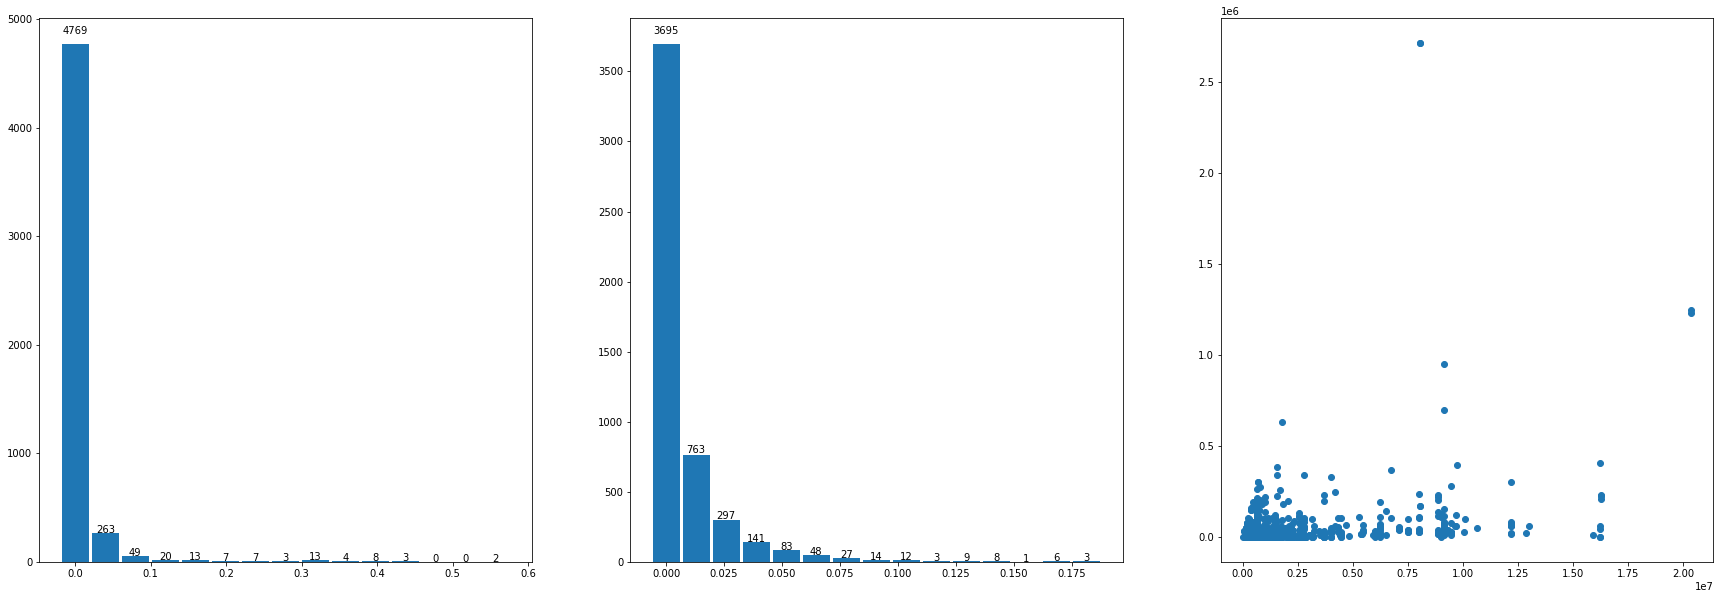

In [11]:
image_size = datas['height'] * datas['width']
image_size = numpy.array(image_size.to_list())
area = bbox[:, 2] * bbox[:, 3]
area_image = area / image_size
plt.figure(figsize=(30,10))
area_image.sort()
plt.subplot(131)
n, bins, _ = plt.hist(area_image, range=(0, area_image[int(len(area_image)*0.9999)]), align='left', rwidth=0.9, bins=15)
for i in range(len(n)):
    plt.text(bins[i]*1, n[i]*1.02, int(n[i]), horizontalalignment="center")
print(bins)
print(area_image)
plt.subplot(132)
n, bins, _ = plt.hist(area_image, range=(0, area_image[int(len(area_image)*0.99)]), align='left', rwidth=0.9, bins=15)
for i in range(len(n)):
    plt.text(bins[i]*1, n[i]*1.02, int(n[i]), horizontalalignment="center")

plt.subplot(133)
plt.scatter(image_size, area)


In [20]:
categories.tail()

,id,name
45,46,音儿
46,47,Monster Guardians
47,48,敷尔佳
48,49,IPSA/茵芙莎
49,50,Schwarzkopf/施华蔻


In [21]:
print(plt.rcParams["font.family"])
print(plt.rcParams['font.sans-serif'])

['sans-serif']
['SimHei']


In [25]:
import matplotlib.font_manager as font_manager
#font_manager._rebuild()
#for font in font_manager.fontManager.ttflist:
#    print(font)

In [75]:
temp = datas
print(temp.drop_duplicates('image_id').groupby(['image_id'],axis=0)['category_id'].count())

image_id
0       1
1       1
2       1
3       1
4       1
       ..
2471    1
2472    1
2473    1
2474    1
2475    1
Name: category_id, Length: 2476, dtype: int64


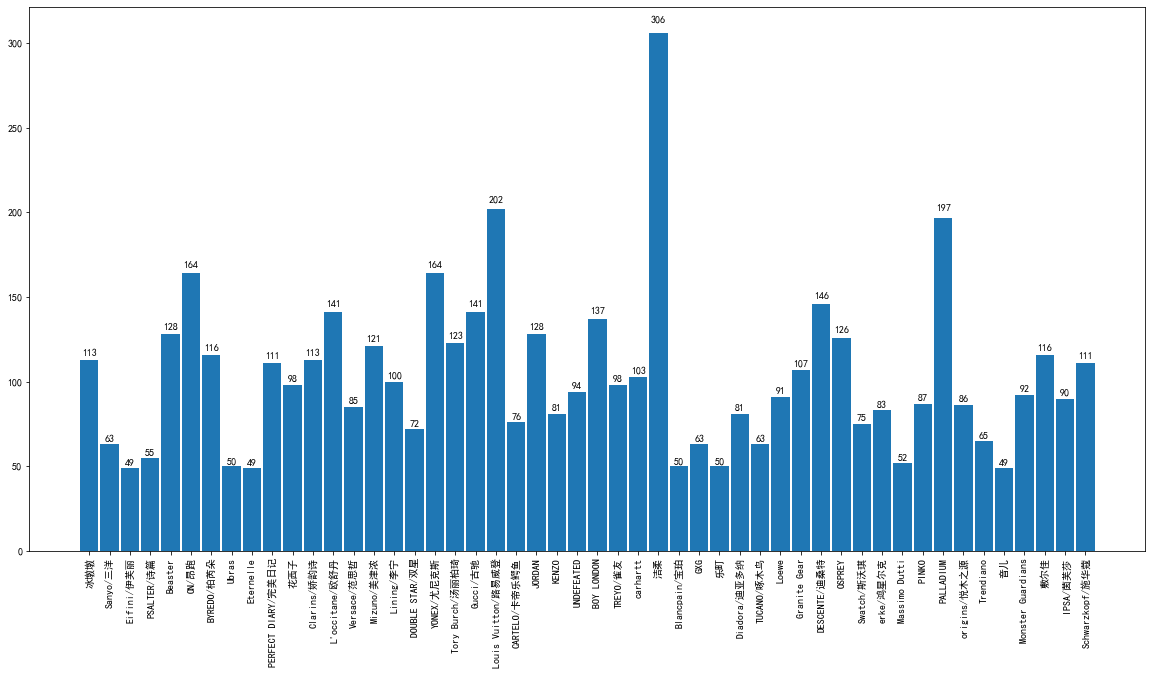

In [73]:
#categories
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20,10))


n, bins, _ = plt.hist(datas['category_id'], bins=range(1, len(categories) + 2, 1), rwidth=0.9, align='left')
for i in range(len(n)):
    plt.text(bins[i]*1, n[i]*1.02, int(n[i]), horizontalalignment="center")

_, _ = plt.xticks(ticks=categories['id'], labels = categories['name'], rotation=90)

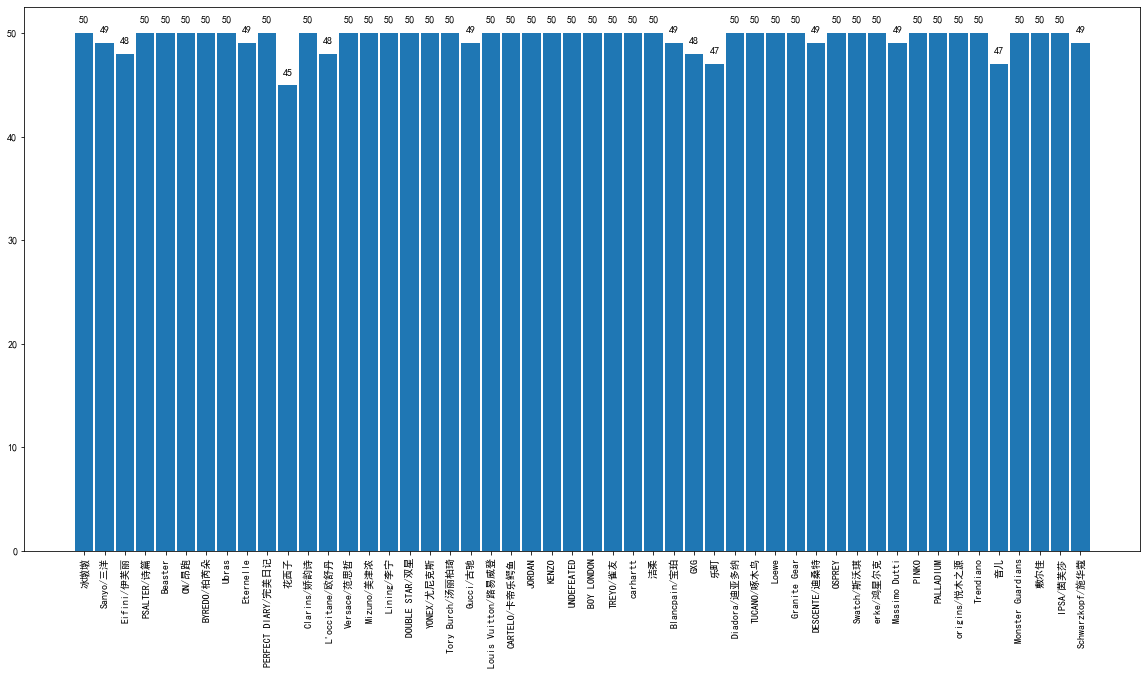

In [76]:
#categories
plt.figure(figsize=(20,10))


n, bins, _ = plt.hist(datas.drop_duplicates('image_id')['category_id'], bins=range(1, len(categories) + 2, 1), rwidth=0.9, align='left')
for i in range(len(n)):
    plt.text(bins[i]*1, n[i]*1.02, int(n[i]), horizontalalignment="center")

_, _ = plt.xticks(ticks=categories['id'], labels = categories['name'], rotation=90)

In [17]:
datas.head()

,image_id,category_id,segmentation,bbox,area,height,width,file_name
0,0,18,"[[340, 235, 340, 260.5, 340, 286, 476.0, 286, ...","[340, 235, 272, 51]",14196,650,650,0218a27cab43f45df80e26195da5599b.jpg
1,0,18,"[[198, 232, 198, 257.5, 198, 283, 242.5, 283, ...","[198, 232, 89, 51]",4680,650,650,0218a27cab43f45df80e26195da5599b.jpg
2,0,18,"[[17, 14, 17, 29.5, 17, 45, 90.5, 45, 164, 45,...","[17, 14, 147, 31]",4736,650,650,0218a27cab43f45df80e26195da5599b.jpg
3,0,18,"[[541, 204, 541, 208.5, 541, 213, 548.5, 213, ...","[541, 204, 15, 9]",160,650,650,0218a27cab43f45df80e26195da5599b.jpg
4,1,18,"[[680, 381, 680, 393.0, 680, 405, 710.5, 405, ...","[680, 381, 61, 24]",1550,600,800,9a9c0764073f88202565197f37a51084.jpg
